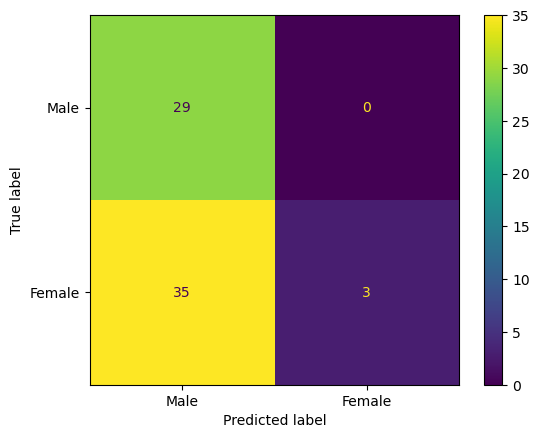

Accuracy: 0.48
Sensitivity (True Positive Rate - Female): 0.08
Specificity (True Negative Rate - Male): 1.00


In [1]:
"""
Name: Alyssia Marshall
Assignment 4: Logistic Regression on Palmer Penguin Dataset
Date: March 10, 2025

Description:
This project applies logistic regression to classify the sex of penguins based on physical attributes.
The implementation is adapted from Chapter 5 of "Machine Learning in Action."
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Load dataset
data = pd.read_csv("penguins_clean.csv")

# Drop rows with missing values
data = data.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'])

# Encode 'sex' column (male=0, female=1)
data['sex'] = data['sex'].map({'male': 0, 'female': 1})

# Select predictor variables (features) and target variable (label)
X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].to_numpy()
y = data['sex'].to_numpy()

# Normalize features using min-max scaling
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X = (X - X_min) / (X_max - X_min)

# Add bias term (column of 1s) for logistic regression
X = np.insert(X, 0, 1, axis=1)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent for Logistic Regression
def grad_ascent(X, y, alpha=0.01, iterations=1000):
    m, n = X.shape
    weights = np.zeros(n)  # Initialize weights
    
    for _ in range(iterations):
        predictions = sigmoid(np.dot(X, weights))
        error = y - predictions
        weights += alpha * np.dot(X.T, error) / m  # Gradient update
    
    return weights

# Train the logistic regression model
beta = grad_ascent(X_train, y_train)

# Prediction function
def predict(X, beta):
    return (sigmoid(np.dot(X, beta)) >= 0.5).astype(int)

# Make predictions
y_pred = predict(X_test, beta)

# Compute accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=['Male', 'Female'])
cm_display.plot()
plt.show()

# Compute sensitivity and specificity
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()
sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity (True Positive Rate - Female): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate - Male): {specificity:.2f}")
